In [29]:
!pip3 install mcerp
import numpy as np
import scipy
import mcerp
import matplotlib.pyplot as plt
import json

In [30]:
data_file_path = "../data.json"
#data_file_path = "../data_validation.json"

with open(data_file_path, "r") as data_file:
    data = json.load(data_file)

In [31]:
target_server = "ecotype-42"
neighbours_numbers = [40,41,43,44]
neighbours = ["ecotype-%s" % i for i in neighbours_numbers]

start_idx = 18
end_idx = -34

def to_temperature(t, data):
    return t * (data["max_temperature"] - data["min_temperature"]) + data["min_temperature"]

def to_power(t, data):
    return t * (data["max_consumption"] - data["min_consumption"]) + data["min_consumption"]

x = [to_power(x, data) for x in data["consumptions"][target_server]["means"][start_idx:end_idx]]
y = [to_temperature(y, data) for y in data["consumptions"][target_server]["temperatures"][start_idx:end_idx]]

neighbours_consumptions = [data["consumptions"][n]["temperatures"][start_idx:end_idx] for n in neighbours]
z = [to_temperature(np.mean(l), data) for l in zip(*neighbours_consumptions)]

verif = list(zip(*[data["consumptions"][x]["timestamps"] for x in data["consumptions"].keys()]))
print(set(verif[start_idx]))
print(set(verif[end_idx]))


{'2019-06-02T00:00:00Z'}
{'2019-07-17T14:00:00Z'}


Text(0.5, 1.0, 'Average back temperature \nof neighbours (deg.C)')

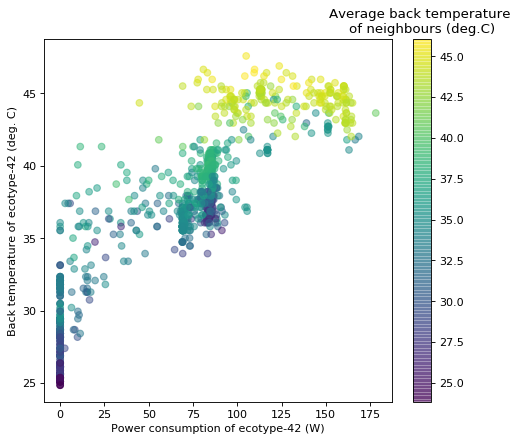

In [32]:
fig, ax = plt.subplots(figsize=(7, 6), dpi= 80)

colors = ['tab:blue', 'tab:orange', 'tab:green']

x_values = np.array(x)
y_values = np.array(y)

color_values = np.array(z)

scatter = ax.scatter(x_values, y_values, c=color_values, label='consumption', alpha=0.5)
clb = fig.colorbar(scatter)


plt.xlabel('Power consumption of ecotype-42 (W)')
plt.ylabel('Back temperature of ecotype-42 (deg. C)')
clb.ax.set_title('Average back temperature \nof neighbours (deg.C)')